In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def gen_data(datapoints, standard_error = 0.3):
    X_vals = np.linspace(0,1,datapoints)
    Y_vals = np.sin(2*np.pi*X_vals)+standard_error*np.random.normal(0,1,datapoints)
    return X_vals, Y_vals

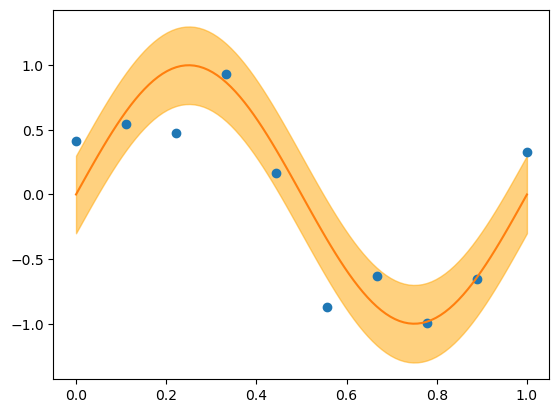

In [13]:
standard_error = 0.3
X_vals, Y_vals = gen_data(10, standard_error)
X_complete = np.linspace(0,1,100)
Y_complete = np.sin(2*np.pi*X_complete)

plt.plot(X_vals,Y_vals,'o')
plt.plot(X_complete,np.sin(2*np.pi*X_complete))
plt.fill_between(X_complete, Y_complete - standard_error, Y_complete + standard_error, color='orange', alpha=0.5, label='Standard Error')



In [14]:
def gen_design_mat(X_vals, degree):
    design_mat = np.zeros((len(X_vals),degree+1))
    for i in range(degree+1):
        design_mat[:,i] = X_vals**i
    return design_mat

In [41]:
import numpy as np

def SVD_calc_theta(X, y, lamb):
  
  U, s, Vh = np.linalg.svd(X)
  s = np.diag(s)  # Convert singular values to diagonal matrix

  r = np.linalg.matrix_rank(s)  # Determine the rank of s
  w = np.zeros_like(Vh[0])  # Initialize w with appropriate size
  print(U.shape, s.shape, Vh.shape)
  for i in range(r):
    w += s[i,i]*(U[:, i].T @ y) / (s[i,i]**2+lamb )* Vh[i]
  return w

# # Example usage (replace with your actual data)
# X = np.array([[1, 2], [3, 4], [5, 6]])
# y = np.array([1, 2, 3])

# U, s, Vh = np.linalg.svd(X)
# s = np.diag(s)  # Convert singular values to diagonal matrix

# w = calculate_w(X, y)
# print("Calculated w:", w)

In [39]:
import numpy as np

def p_calculate_w(X, y):
  """
  Calculates w using the provided formula based on SVD.

  Args:
    U: Left singular vectors from SVD.
    s: Singular values from SVD.
    Vh: Transpose of right singular vectors from SVD.
    y: The target variable vector.

  Returns:
    The calculated w vector.
  """
  U, s, Vh = np.linalg.svd(X)
  s = np.diag(s)  # Convert singular values to diagonal matrix

  r = np.linalg.matrix_rank(s)  # Determine the rank of s
  w = Vh.T@np.linalg.pinv(s)@U.T@y
  return w

# # Example usage (replace with your actual data)
# X = np.array([[1, 2], [3, 4], [5, 6]])
# y = np.array([1, 2, 3])

# U, s, Vh = np.linalg.svd(X)
# s = np.diag(s)  # Convert singular values to diagonal matrix

# w = calculate_w(X, y)
# print("Calculated w:", w)

(10, 10) (10, 10) (10, 10)


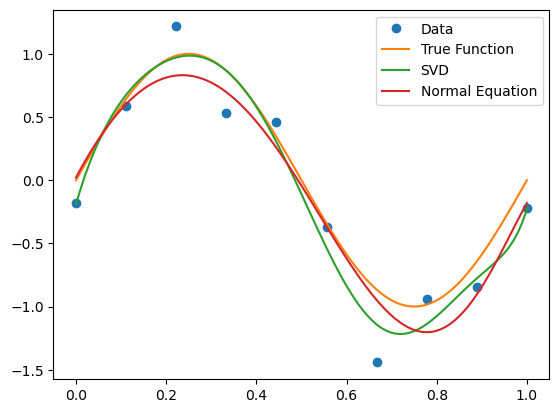

In [46]:
degree = 9
X = gen_design_mat(X_vals, degree)

def calc_theta(X, Y_vals, lambda_val=0):
    lambda_eye = lambda_val*np.eye(X.shape[1])
    lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
    theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
    return theta

plt.plot(X_vals,Y_vals,'o')
plt.plot(X_complete,np.sin(2*np.pi*X_complete))
theta = calculate_w(X,Y_vals, np.exp(-18))
plt.plot(X_complete,gen_design_mat(X_complete,degree) @ theta)

theta = calc_theta(X,Y_vals, 1e-3)
plt.plot(X_complete,gen_design_mat(X_complete,degree) @ theta)
plt.legend(['Data','True Function','SVD','Normal Equation'])

In [17]:
print(theta) # just to show that the coefficients are larger than bishops example

[-0.05243481 -0.0346281  -0.02794924 -0.02414351 -0.02165106 -0.01988316
 -0.01856352 -0.01754304 -0.01673321 -0.0160778 ]


In [18]:
import sympy as sp
# This is just to show the matrices

lambda_eye = np.exp(-18) * np.eye(X.shape[1])
X = sp.Matrix(X)
Y_vals = sp.Matrix(Y_vals)
lambda_eye = sp.Matrix(lambda_eye)

def print_matrix(matrix, title):
    print(f"{title}:\n")
    sp.pretty_print(matrix.evalf(2))
    print("\n")

print_matrix(X, 'Matrix X')

Matrix X:

⎡1.0   0      0      0        0        0        0        0        0        0   ⎤
⎢                                                                              ⎥
⎢1.0  0.11  0.012  0.0014  0.00015  1.7e-5   1.9e-6   2.1e-7   2.3e-8   2.6e-9 ⎥
⎢                                                                              ⎥
⎢1.0  0.22  0.049  0.011   0.0024   0.00054  0.00012  2.7e-5   5.9e-6   1.3e-6 ⎥
⎢                                                                              ⎥
⎢1.0  0.33  0.11   0.037    0.012   0.0041   0.0014   0.00046  0.00015  5.1e-5 ⎥
⎢                                                                              ⎥
⎢1.0  0.44   0.2   0.088    0.039    0.017   0.0077   0.0034   0.0015   0.00068⎥
⎢                                                                              ⎥
⎢1.0  0.56  0.31    0.17    0.095    0.053    0.029    0.016   0.0091    0.005 ⎥
⎢                                                                              ⎥
⎢1.0  0.67  0.44 

In [19]:
# Print Y_vals
print_matrix(Y_vals, 'Matrix Y_vals')

Matrix Y_vals:

⎡0.42 ⎤
⎢     ⎥
⎢0.54 ⎥
⎢     ⎥
⎢0.48 ⎥
⎢     ⎥
⎢0.93 ⎥
⎢     ⎥
⎢0.17 ⎥
⎢     ⎥
⎢-0.87⎥
⎢     ⎥
⎢-0.63⎥
⎢     ⎥
⎢-0.99⎥
⎢     ⎥
⎢-0.65⎥
⎢     ⎥
⎣0.33 ⎦




In [20]:
# Print lambda_val * I
print_matrix(lambda_eye, 'Matrix lambda_val * I')

Matrix lambda_val * I:

⎡1.5e-8    0       0       0       0       0       0       0       0       0   ⎤
⎢                                                                              ⎥
⎢  0     1.5e-8    0       0       0       0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0     1.5e-8    0       0       0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0       0     1.5e-8    0       0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0       0       0     1.5e-8    0       0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0       0       0       0       0     1.5e-8    0       0       0       0   ⎥
⎢                                                                              ⎥
⎢  0

In [21]:
from scipy.optimize import minimize

In [22]:
lambda_vals = []
for i in range(10):
    degree = 9
    standard_error = 0.3
    num_datapoints = 10

    X_vals, Y_vals = gen_data(num_datapoints, standard_error)
    X_complete = np.linspace(0,1,100)
    Y_complete = np.sin(2*np.pi*X_complete)

    X = gen_design_mat(X_vals, degree)
    X_c = gen_design_mat(X_complete, degree)

    def calc_theta(X, Y_vals, lambda_val=0):
        lambda_eye = lambda_val*np.eye(X.shape[1])
        lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
        theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
        return theta


    def opt_lambda(lambda_val):
        lambda_eye = lambda_val*np.eye(X.shape[1])
        lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
        theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
        mse = np.mean((X_c @ theta - Y_complete)**2)
        return mse
        
    lambda_val = minimize(opt_lambda, 0).x
    lambda_vals.append(lambda_val)
    print(lambda_val)

print(np.mean(lambda_vals)/np.exp(-18)) # The average lambda value is 15 000 times the optimal lambda value


[0.00030656]
[0.00081654]
[4.82290574e-05]
[-0.00074264]
[4.71656644e-06]
[6.95390017e-05]
[0.00016534]
[4.81385844e-05]
[4.40608791e-05]
[0.00028414]
6859.0349672661705
